YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 0.0328
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0022
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0014
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0013
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0011
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0013
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0011
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0010
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 9.5308e-04
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - loss: 0.0010
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 9.2366e-04
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 9.0881e-04
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 8.5594e-04
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 9.6858e-04
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms

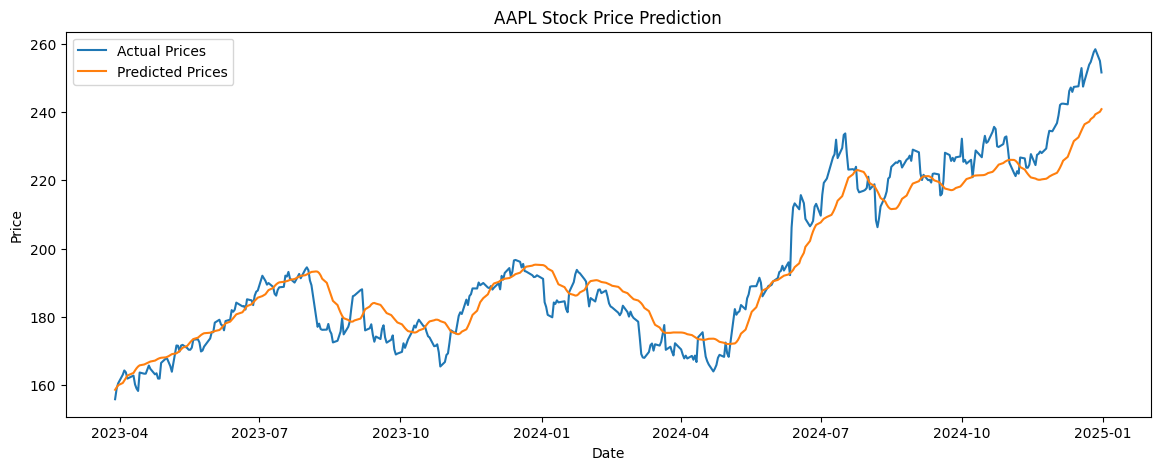

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Fetch stock data
stock_symbol = "AAPL"  # You can change this to any stock ticker symbol
df = yf.download(stock_symbol, start="2015-01-01", end="2025-01-01")

# Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Creating training data
train_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_len]
test_data = scaled_data[train_len:]

def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:i+time_step])
        Y.append(data[i+time_step])
    return np.array(X), np.array(Y)

time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshape data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=20, batch_size=64)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot predictions
plt.figure(figsize=(14,5))
plt.plot(df.index[-len(predictions):], scaler.inverse_transform(Y_test.reshape(-1,1)), label="Actual Prices")
plt.plot(df.index[-len(predictions):], predictions, label="Predicted Prices")
plt.legend()
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()